## 1. Variable Identification
- **Numerical**
    - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit - **Discrete**
    - X5: Age (year) - **Discrete**
    - X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005 - **Discrete**
    - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005 - **Discrete**
- **Categorical**
    - **Y: default payment (Yes = 1, No = 0) - Target Variable/Nominal**
    - X2: Gender (1 = male; 2 = female) - **Nominal**
    - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) - **Nominal/Ordinal**
    - X4: Marital status (1 = married; 2 = single; 3 = others) - **Nominal**
    - X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above - **Nominal**
- **Comments**
    - The dataset contains 23 explanatory variables, with the target variable being the default payment variable.




In [1]:
# ---------------------- import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----------------------- import dataset
data = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Classification\\CreditDefault\\default-of-credit-card-clients.csv', skiprows = 1)
data = data[:]

In [3]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
data.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

In [80]:
# ------------------------ variables
num_data = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_data = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
target = 'default payment next month'

In [6]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#------------------------ identification of datatypes
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
# ----------------------- size of dataset
data.shape

(30000, 25)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Observations**
- The dataset consists of 25 columns and 30000 rows. Of the 25 columns, 23 are explanatory variables, a target variable, and an ID column.
- Each categorical variable has already been label encoded.
- There are no missing values.

In [10]:
# ----------------------- Summary statistics of numerical variables
data[num_data].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## 2. Non-graphical univariate analysis

In [11]:
# ----------------------- unique values in categorical variables
data[cat_data].nunique()

SEX           2
EDUCATION     7
MARRIAGE      4
PAY_1        11
PAY_2        11
PAY_3        11
PAY_4        11
PAY_5        10
PAY_6        10
dtype: int64

In [12]:
# ------------------------ distribution of target variables
data[target].value_counts()

default payment next month
0                             23364
1                              6636
dtype: int64

In [13]:
data['PAY_1'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_1, dtype: int64

In [14]:
data['PAY_2'].value_counts().sort_index()

-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64

**Observations**
- History of past payments (PAY_1 - PAY_6) contains categories ranging from -2 to 8. The description of the data set states that the categories should range from -1 to 9.

In [15]:
# ----------------------- add 1 to each value in the history of past payments columns (PAY_1 to PAY_6)
for item in cat_data[3:]:
    data[item] = [i + 1 for i in data[item]]

In [16]:
data['PAY_1'].value_counts().sort_index()

-1     2759
 0     5686
 1    14737
 2     3688
 3     2667
 4      322
 5       76
 6       26
 7       11
 8        9
 9       19
Name: PAY_1, dtype: int64

In [144]:
data['LIMIT_BAL'].value_counts().sort_index()

10000       493
16000         2
20000      1976
30000      1610
40000       230
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [143]:
data['BILL_AMT1'].value_counts()

0         2008
390        244
780         76
326         72
316         63
          ... 
206461       1
406995       1
219081       1
26495        1
13741        1
Name: BILL_AMT1, Length: 22723, dtype: int64

## 3. Graphical univariate analysis

In [91]:
def cat_dist(cat_col):
    fig, axes = plt.subplots(3, 3, figsize=(40, 25))
    axes = axes.flatten()
    for col, axe in zip(cat_col, axes):
        sns.countplot(x = data[col], hue = data[target], ax = axe)
        plt.tight_layout()
        for p in axe.patches:
            axe.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

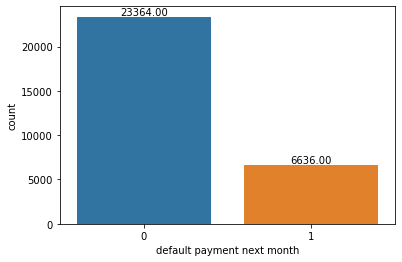

In [92]:
tplot = sns.countplot(x = data[target])
for p in tplot.patches:
    tplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

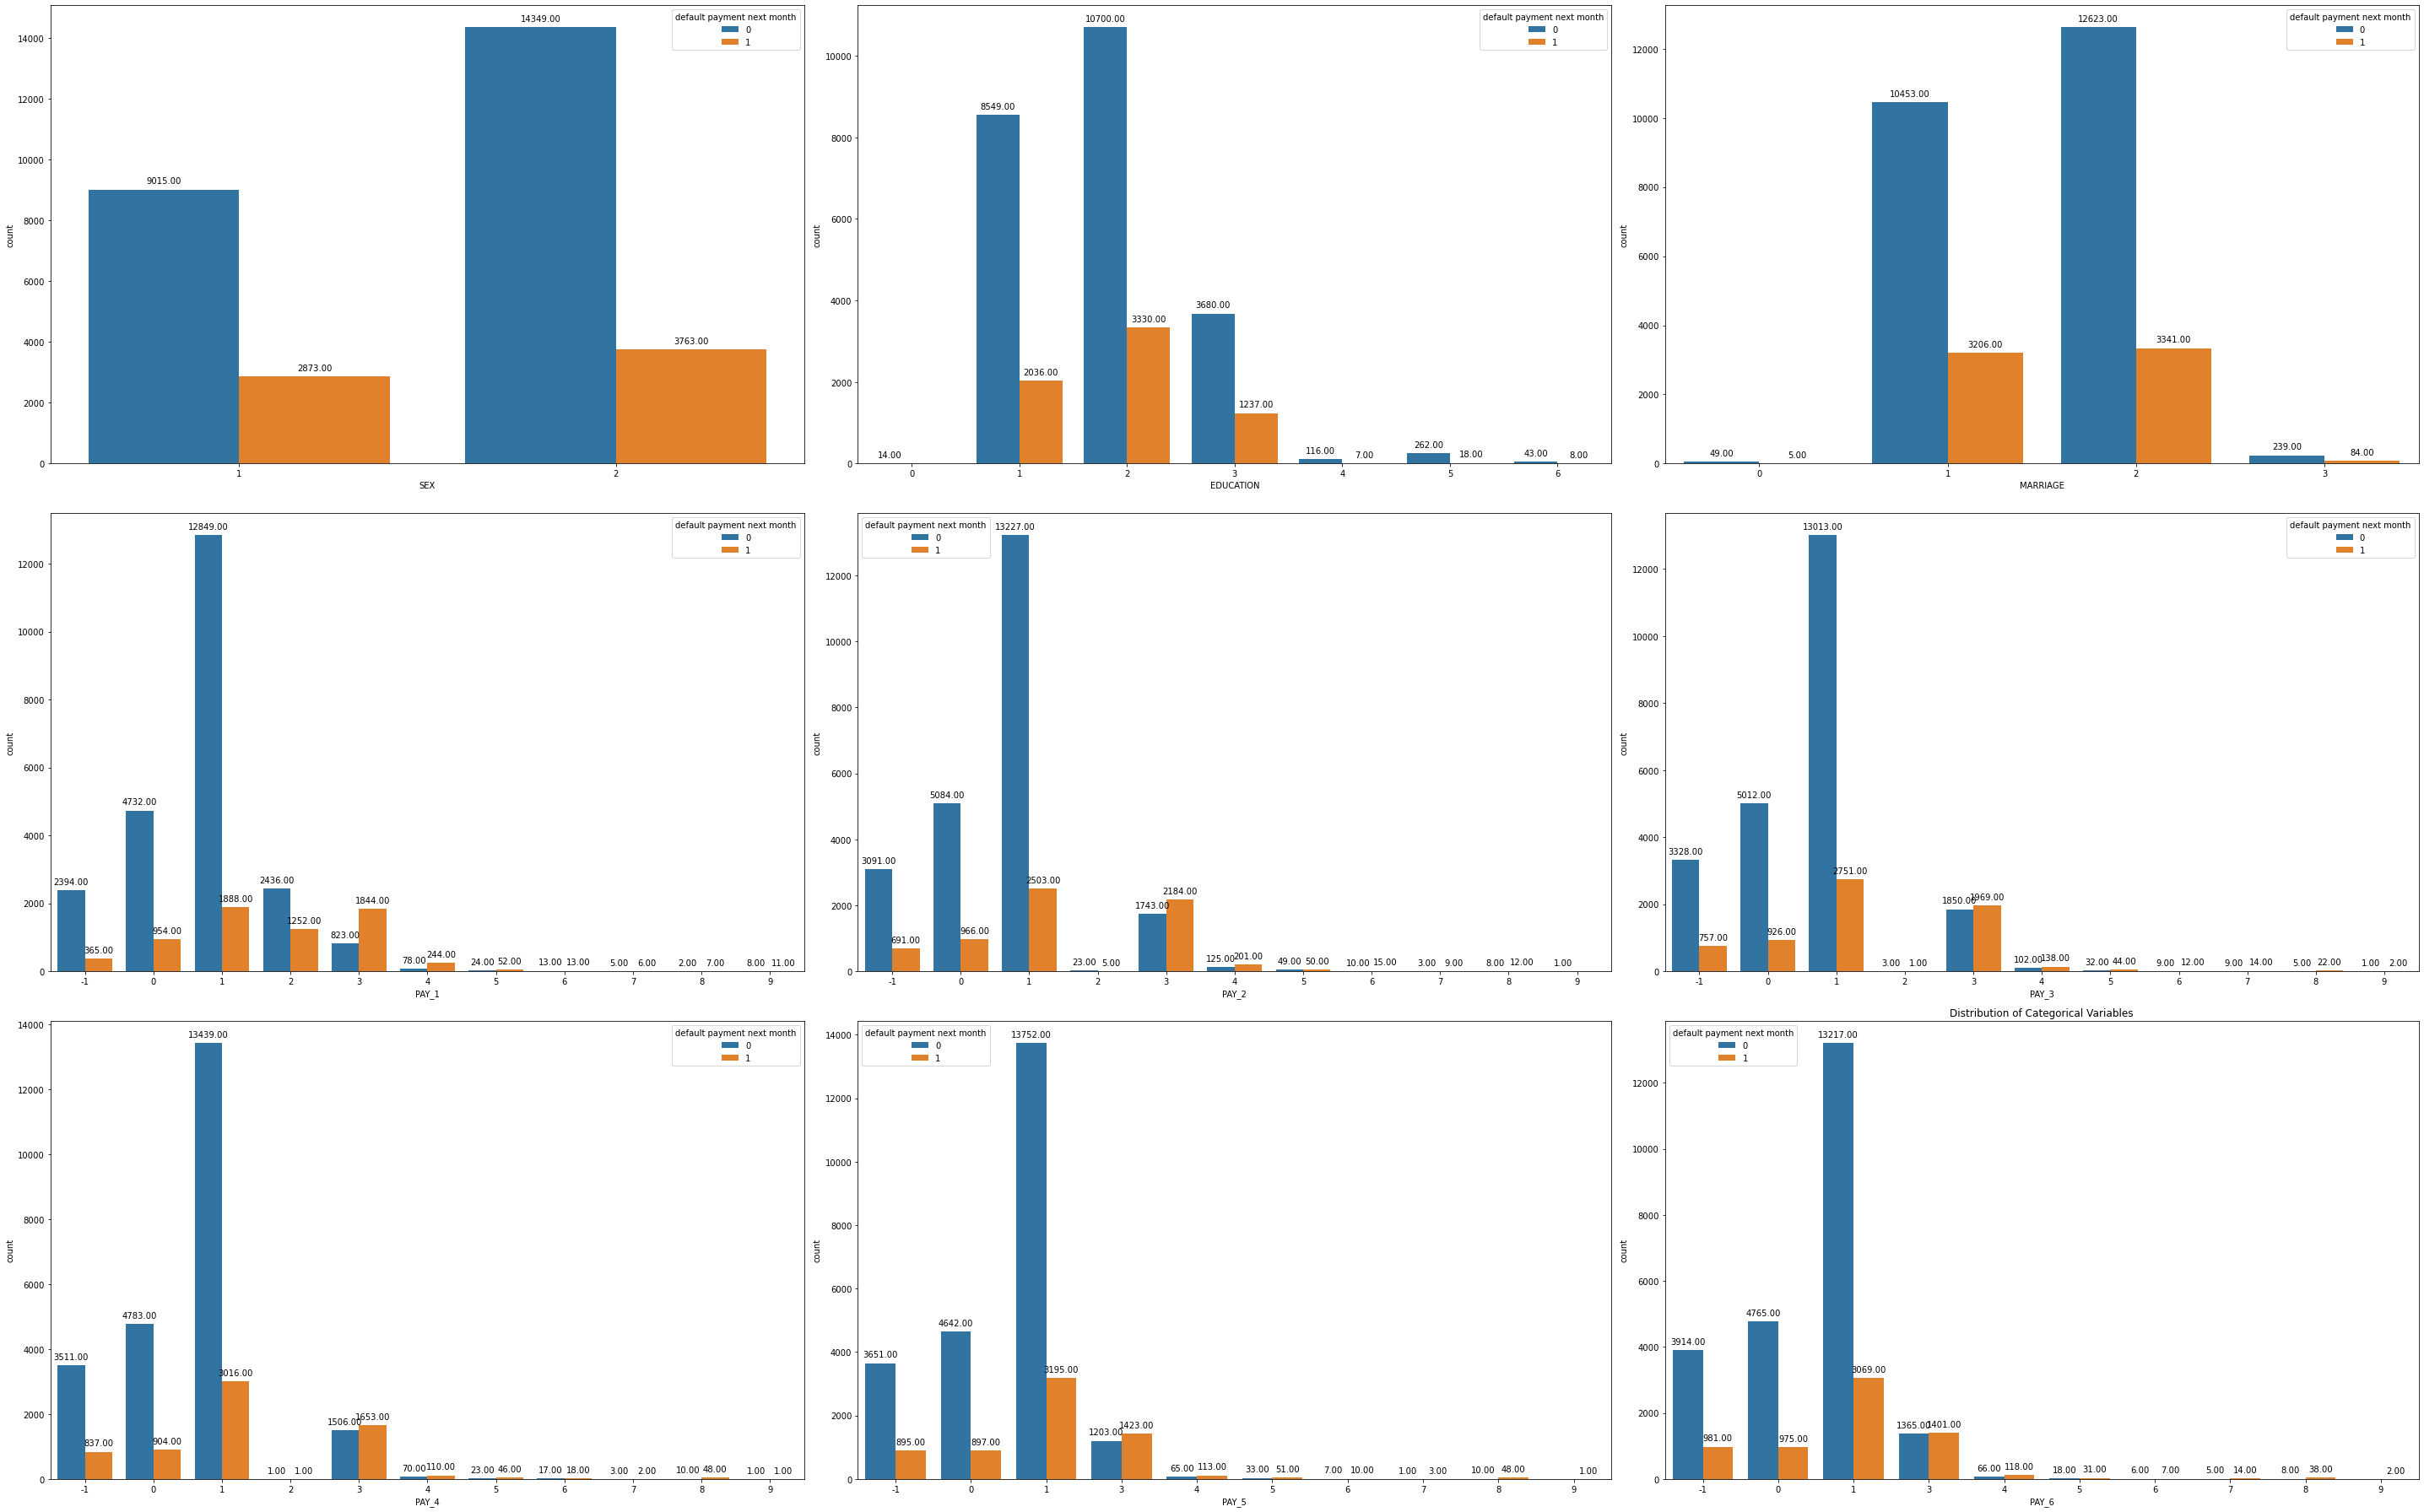

In [93]:
cat_dist(cat_data)

**Observations**
- The target variable is imbalanced consisting of less defaults than non-defaults. This will pose a challenge when we conduct a predictive analysis.
- The sex category shows that there are slightly more females than males represented in this dataset.
- The education category shows that there are most people represented have at least a high school degree.
- The marriage category shows that there are slightly more singles than married couples represented in this dataset, and very few being otherwise.
- The history of payment plots show that most people tend to delay payments for one month

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

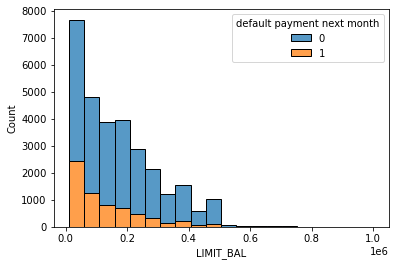

In [147]:
sns.histplot(x = data['LIMIT_BAL'], hue = data[target], multiple = 'stack', bins = 20)


In [136]:
def num_dist(num_col):
    fig, axes = plt.subplots(5, 3, figsize=(25, 25))
    axes = axes.flatten()
    for col, axe in zip(num_col, axes):
        sns.kdeplot(x = data[col], hue = data[target], multiple = 'stack', ax = axe)
        plt.tight_layout()

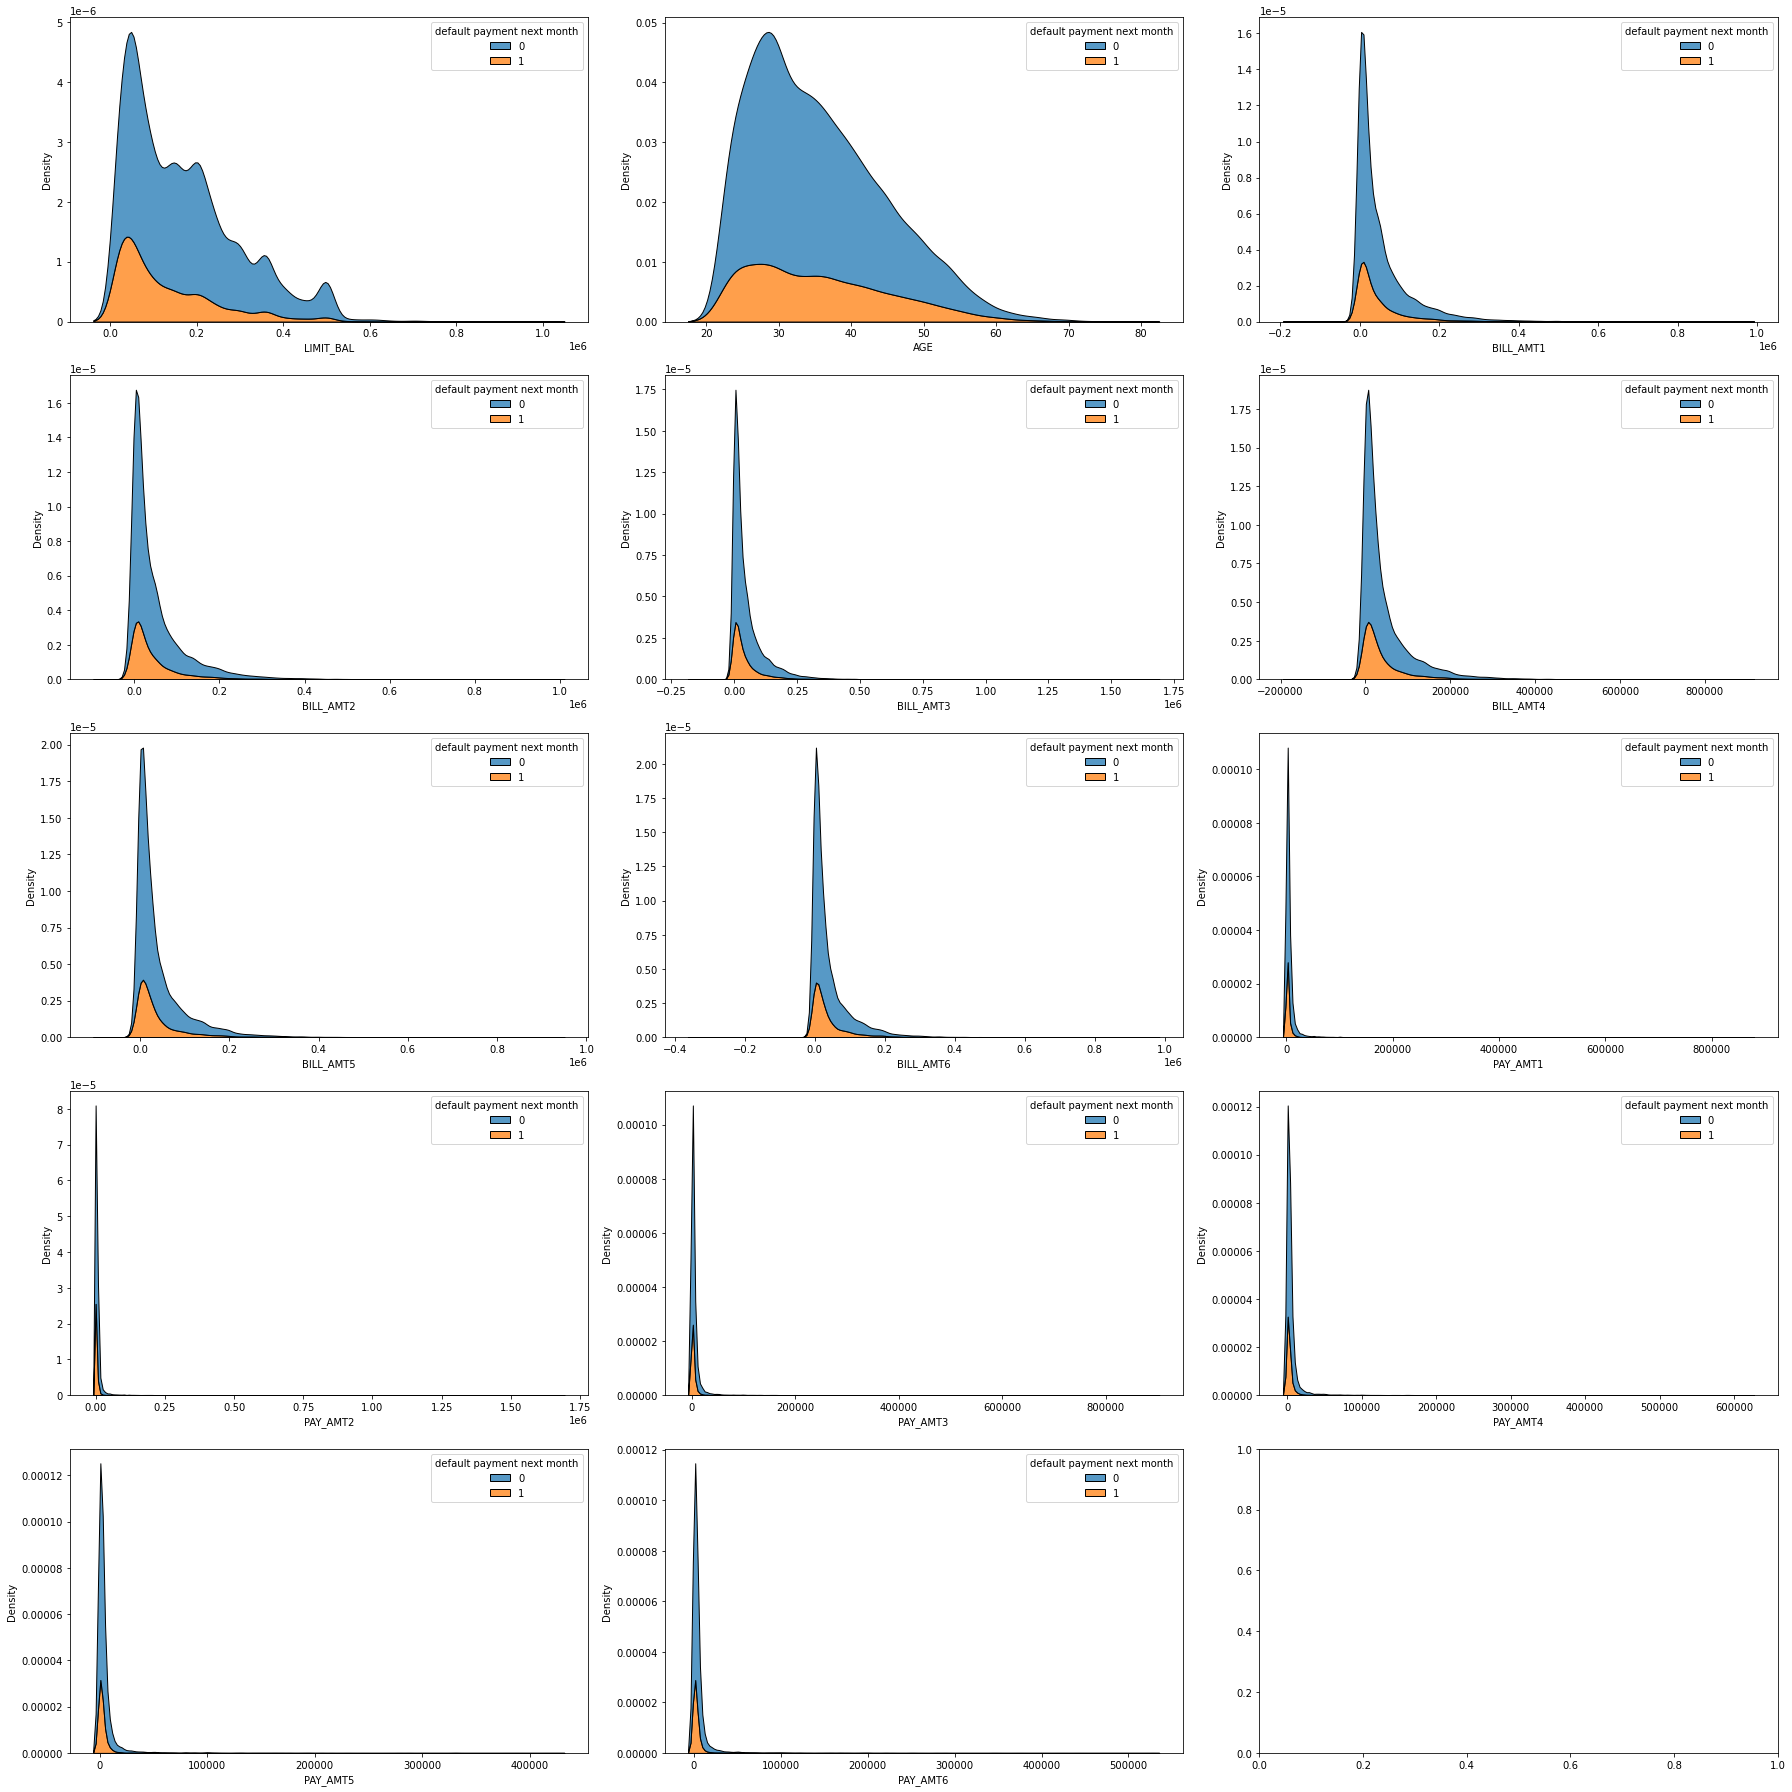

In [138]:
num_dist(num_data)